In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from tkinter import *

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")

In [3]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
dataset.shape


(200, 5)

In [7]:
print("No of rows:",dataset.shape[0])
print("No of columns:",dataset.shape[1])

No of rows: 200
No of columns: 5


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
dataset.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [16]:
x=dataset[['Annual Income (k$)','Spending Score (1-100)']]

In [17]:
from sklearn.cluster import KMeans

In [18]:
kmeans=KMeans()
kmeans.fit(x)

KMeans()

In [23]:
kmeans=KMeans()
kmeans.fit_predict(x)

array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 0, 4, 0, 0,
       5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 6, 0, 6, 0, 0, 6, 6, 0, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 2, 3, 6, 3, 2, 3, 2, 3,
       6, 3, 2, 3, 2, 3, 2, 3, 2, 3, 6, 3, 2, 3, 6, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 6, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1,
       7, 1])

In [25]:
#elbow method
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [27]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30273.394312070042,
 25050.832307547527,
 21826.936303231654,
 19634.554629349976]

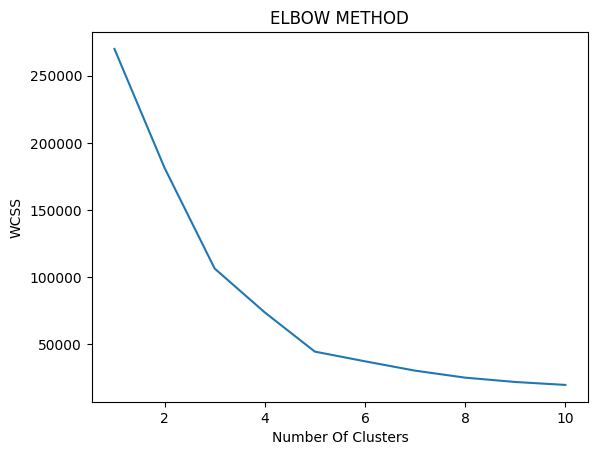

In [29]:
plt.plot(range(1,11),wcss)
plt.title("ELBOW METHOD")
plt.xlabel("Number Of Clusters")
plt.ylabel("WCSS")
plt.show()

In [30]:
#model with optimal clusters
x=dataset[['Annual Income (k$)','Spending Score (1-100)']]

In [32]:
kmeans=KMeans(n_clusters=5,random_state=42)
y_clusters=kmeans.fit_predict(x)

In [33]:
y_clusters

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

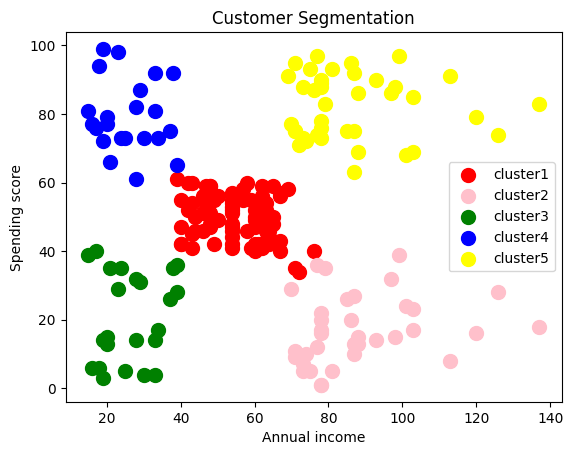

In [37]:
plt.scatter(x.iloc[y_clusters==0,0],x.iloc[y_clusters==0,1],s=100,c="red",label="cluster1")
plt.scatter(x.iloc[y_clusters==1,0],x.iloc[y_clusters==1,1],s=100,c="pink",label="cluster2")
plt.scatter(x.iloc[y_clusters==2,0],x.iloc[y_clusters==2,1],s=100,c="green",label="cluster3")
plt.scatter(x.iloc[y_clusters==3,0],x.iloc[y_clusters==3,1],s=100,c="blue",label="cluster4")
plt.scatter(x.iloc[y_clusters==4,0],x.iloc[y_clusters==4,1],s=100,c="yellow",label="cluster5")
plt.legend()
plt.title("Customer Segmentation")
plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.show()

In [41]:
kmeans.predict([[10,30]])

C:\Users\pavan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2])

In [43]:
#saving the model
joblib.dump(kmeans,"Customer Segmentation")

['Customer Segmentation']

In [44]:
model=joblib.load("Customer Segmentation")

In [45]:
model.predict([[10,30]])

C:\Users\pavan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2])

In [115]:
#GUI
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
   
    
    model=joblib.load("Customer Segmentation")
    result=model.predict([[p1,p2]])
    print("This customer belongs to cluster:",result[0])
    
    if result[0]==0:
        Label(master,text="Customers with medium annual income and medium spending score")
    elif result[0]==1:
        Label(master,text="Customers with high annual income and low spending score")
    elif result[0]==2:
        Label(master,text="Customers with low annual income and low spending score")
    elif result[0]==3:
        Label(master,text="Customers with low annual income and high spending score")
    elif result[0]==4:
        Label(master,text="Customers with high annual income and high spending score")
        
master = Tk()
master.title("Customer Segmentation")
master.geometry('400x270')
master.resizable(False,False)

label=Label(master,text="     Customer Segmentation using ML",font="arial 15").grid(row=0,columnspan=8)

Label(master,text="          Annual Income  : ",font='bold 12').grid(row=1)
Label(master,text="         Spending Score : ",font='bold 12').grid(row=2)

e1=Entry(master,width=8,font='arial 12')
e2=Entry(master,width=8,font='arial 12')

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)

Button(master,text="Predict",font='arial 12',bg='black',fg='white',command=show_entry_fields).place(x=130,y=80)

mainloop()

C:\Users\pavan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


This customer belongs to cluster: 1
